In [2]:
from __future__ import absolute_import, division, print_function
import glob
import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import pdb
import getpass
from scipy import stats
from sklearn import linear_model
from numpy import linalg as LA
import numpy.random as npr
from sklearn.decomposition import PCA

ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'
elif ui == 'lndrisco':
    p = '/home/users/lndrisco'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net)

PATH_YANGNET = os.path.join(p,'code/multitask-nets',net)

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model
import tools
from tools_lnd import get_T_inds, plot_N, plot_FP, name_best_ckpt, generate_Beta_epoch, make_h_combined, same_stim_trial

PATH_TO_RECURRENT_WHISPERER = p+'/code/recurrent-whisperer'#'/home/laura/code/recurrent-whisperer'#
sys.path.insert(0, PATH_TO_RECURRENT_WHISPERER)
from RecurrentWhisperer import RecurrentWhisperer

PATH_TO_FIXED_POINT_FINDER = p+'/code/fixed-point-finder' #'/home/laura/code/fixed-point-finder-experimental'#
sys.path.insert(0, PATH_TO_FIXED_POINT_FINDER)
from FixedPointFinder import FixedPointFinder

In [3]:
def make_axes(model_dir_all,ckpt_n_dir,rule_master,epoch):

    model = Model(model_dir_all)
    with tf.Session() as sess:

        model.saver.restore(sess,ckpt_n_dir)
        # get all connection weights and biases as tensorflow variables
        var_list = model.var_list
        # evaluate the parameters after training
        params = [sess.run(var) for var in var_list]
        # get hparams
        hparams = model.hp
        trial_master = generate_trials(rule_master, hparams, mode = 'test', batch_size = 400, noise_on=False, delay_fac =1)
        feed_dict = tools.gen_feed_dict(model, trial_master, hparams)
        h_tf = sess.run(model.h, feed_dict=feed_dict) #(n_time, n_trials, n_neuron)

    Beta_epoch = generate_Beta_epoch(h_tf,trial_master)
    X_pca = Beta_epoch[epoch]    
    D = np.concatenate((np.expand_dims(X_pca[:,0],axis=1),np.expand_dims(X_pca[:,1],axis=1)),axis = 1)
    return D

In [11]:
def calc_dim(X, nD = 10, N = 256):

    shapes = np.shape(X)
    
    if len(shapes) == 3:
        X = np.reshape(np.transpose(X,(2,0,1)),(N,-1)).T
        
    if shapes[1] != N:
        X = X.T
        
    pca = PCA(n_components = nD)
    X_pca = pca.fit_transform(X)
    exp_var = np.var(X_pca,axis = 0)
    
    return exp_var

In [5]:
net = 'stepnet'
tasks = [5]
rule = rules_dict['all'][tasks[0]]
fp_epoch = 'stim1'
model_n = 0
dir_specific_all = 'crystals/softplus/l2h00001'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
model_dir_all = os.path.join(p,'data/rnn/multitask/',dir_specific_all,str(model_n))
ckpt_n = name_best_ckpt(model_dir_all,rule)
ckpt_n_dir = os.path.join(model_dir_all,'ckpts/model.ckpt-' + str(int(ckpt_n)))

task_list = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti',
              'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm',
              'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
['delay1', 'stim1', 'go1', 'fix1']


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


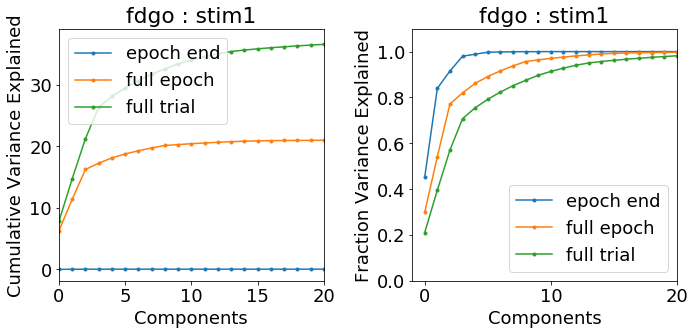

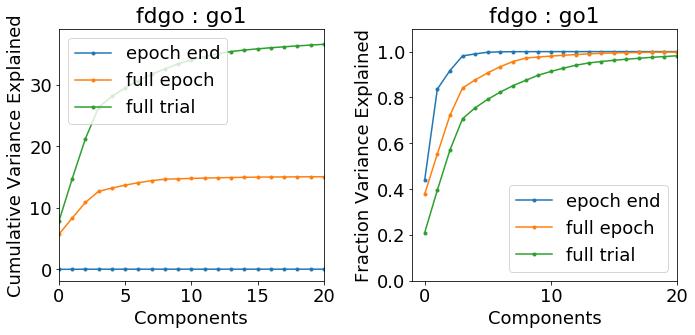

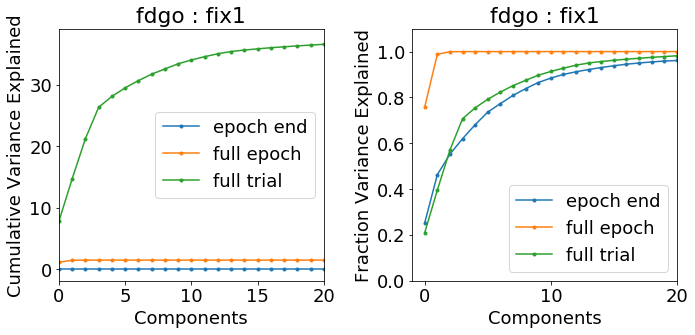

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


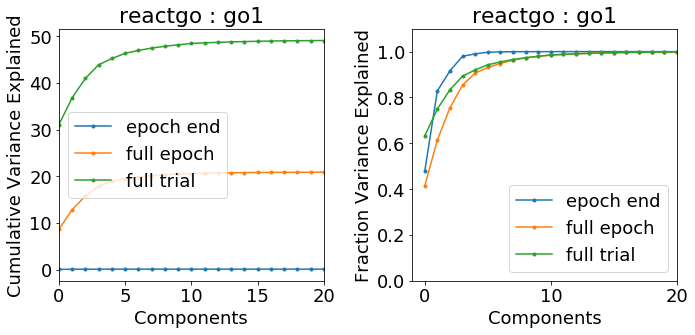

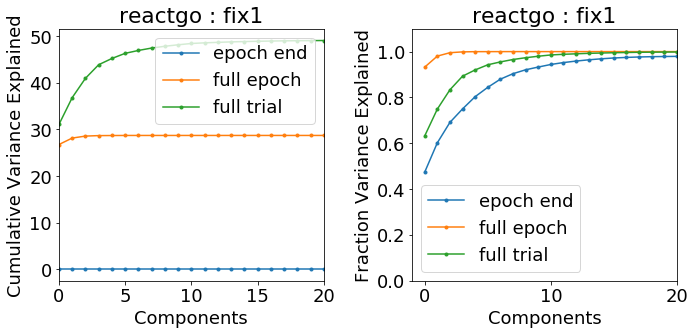

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


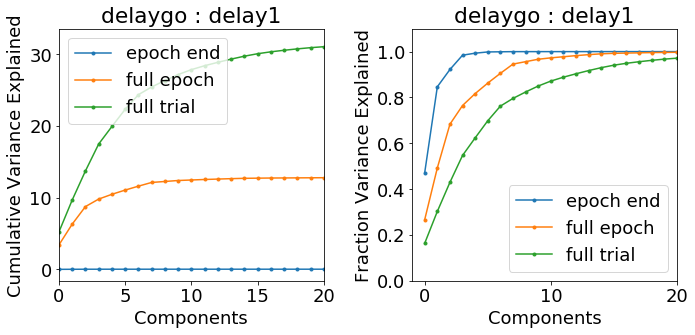

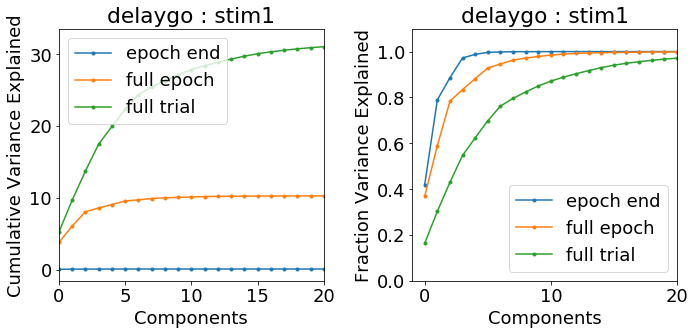

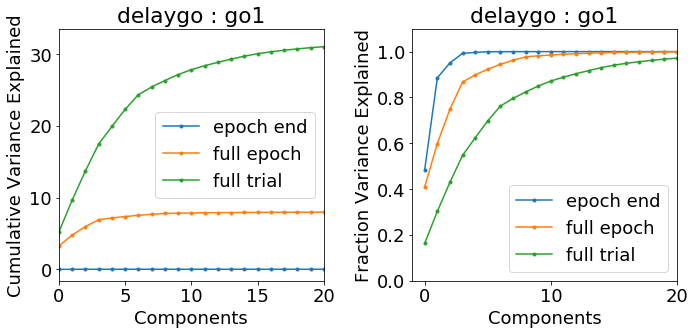

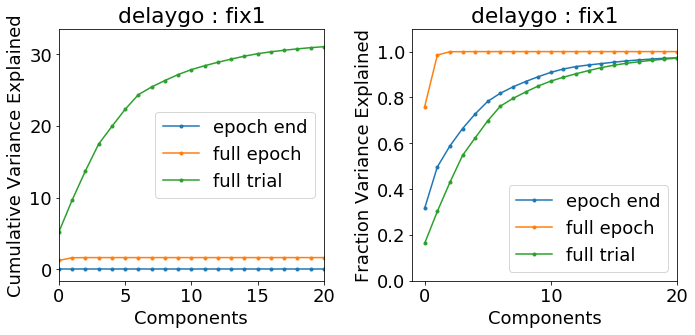

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


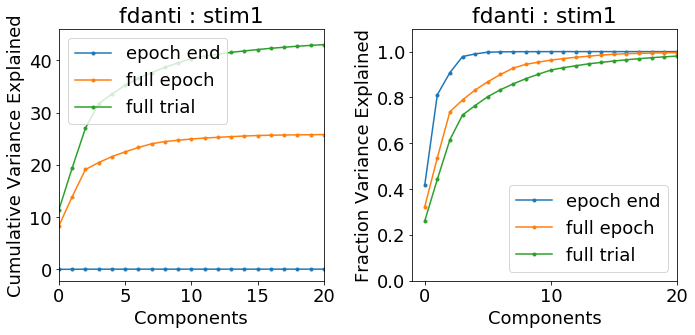

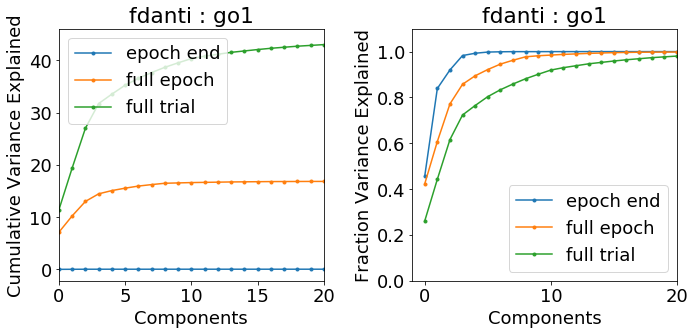

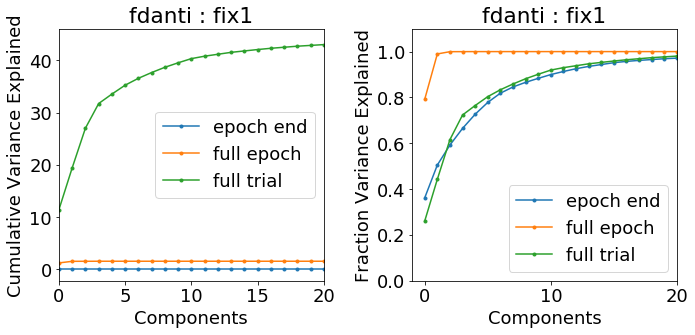

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


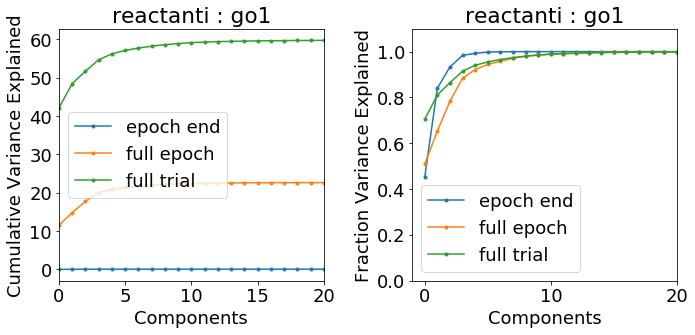

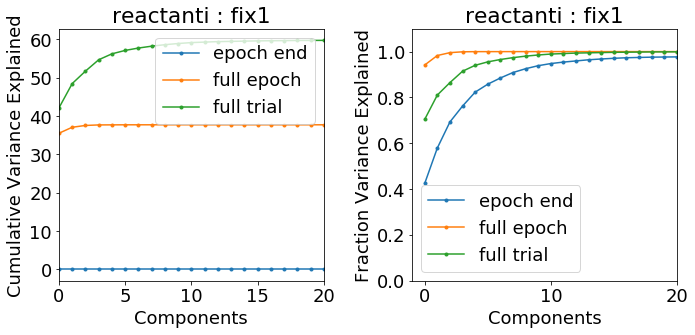

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


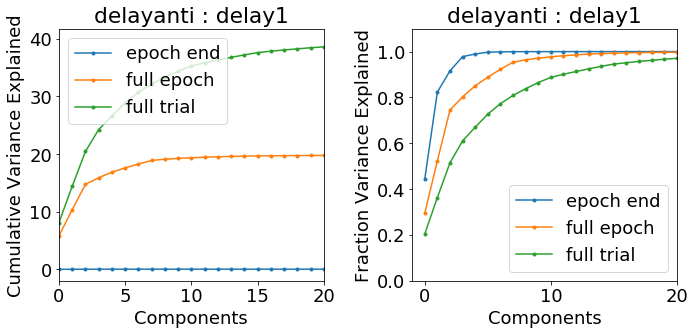

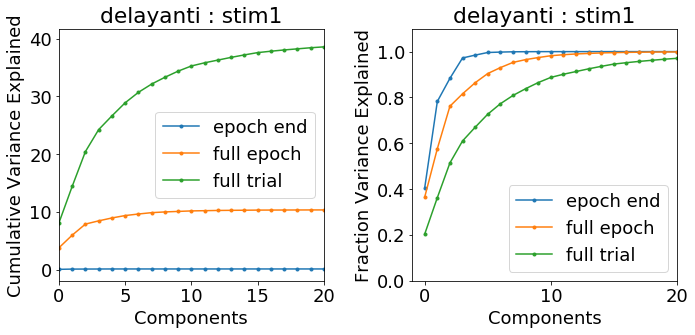

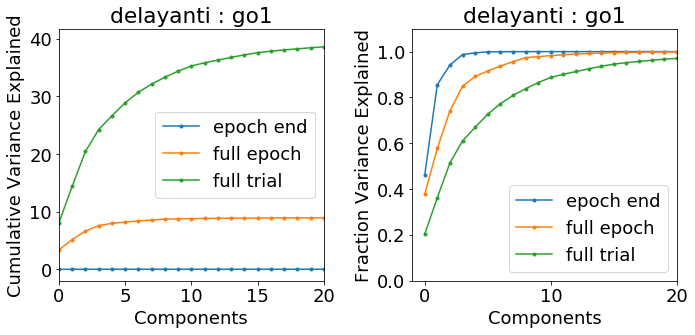

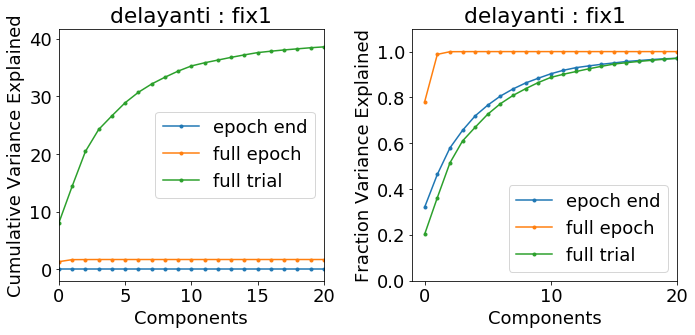

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


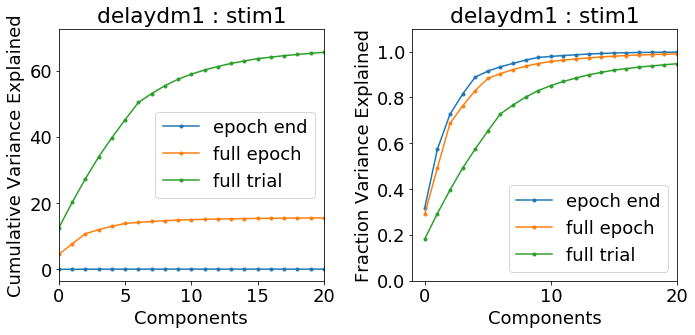

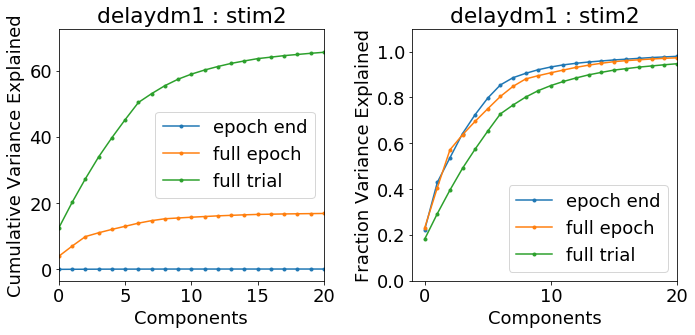

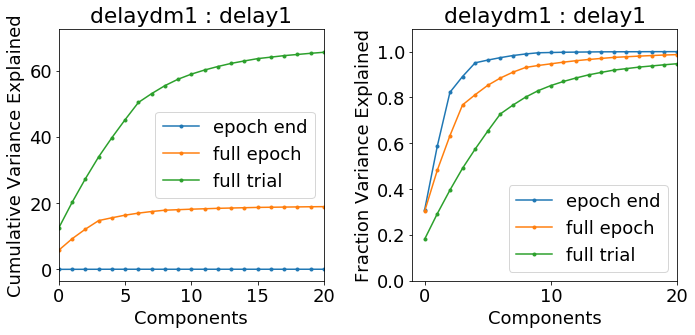

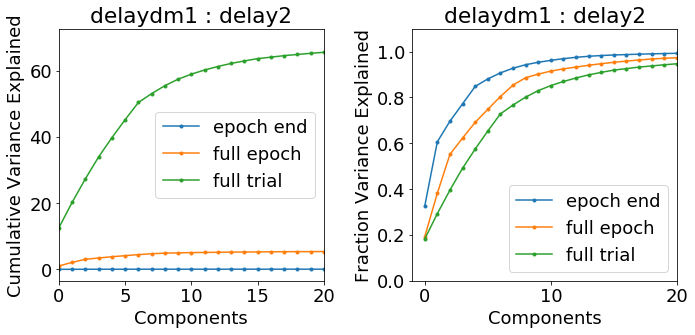

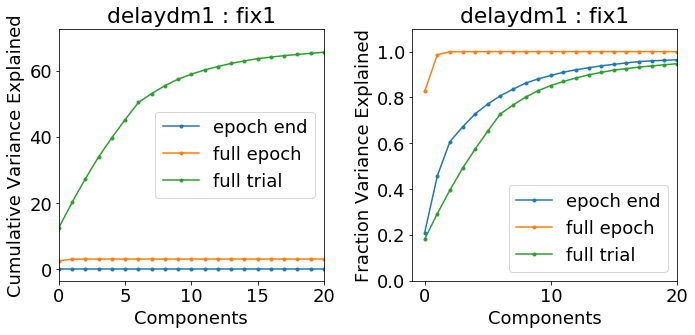

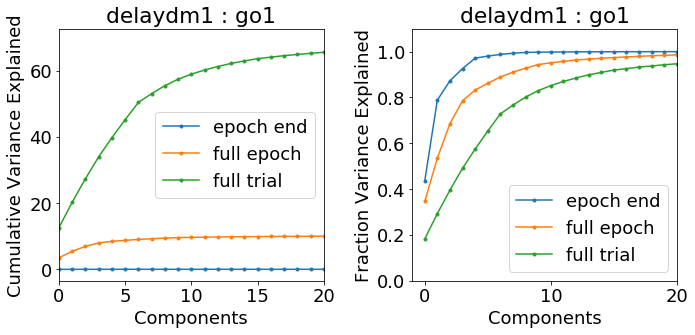

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


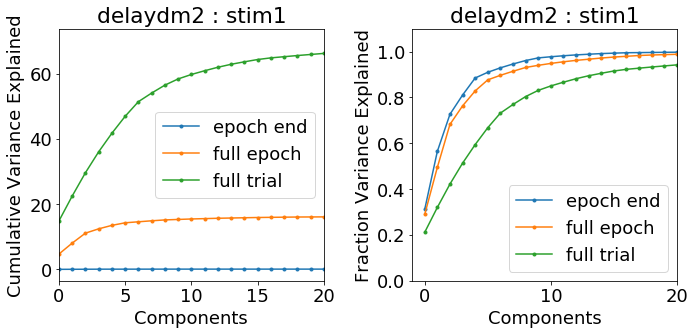

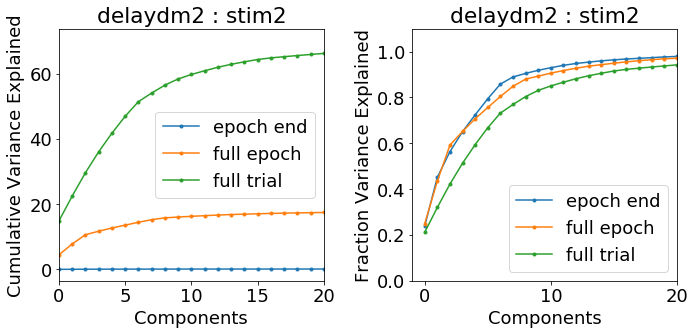

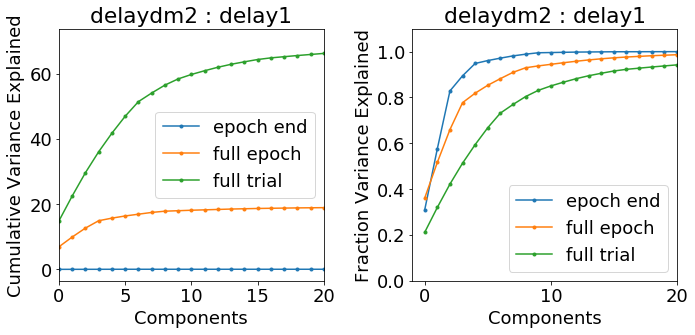

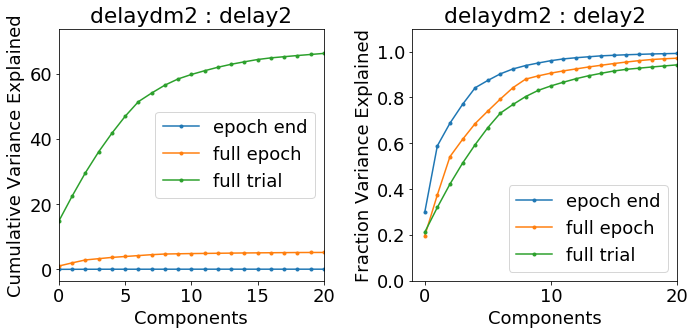

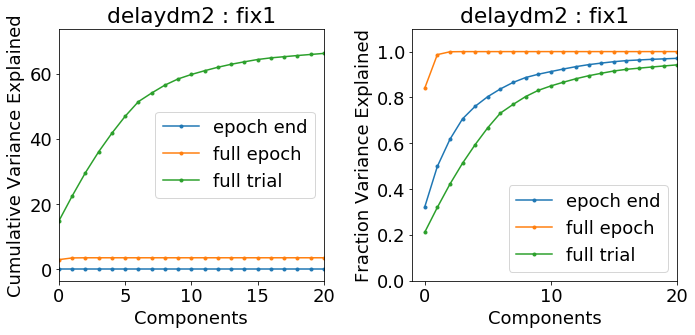

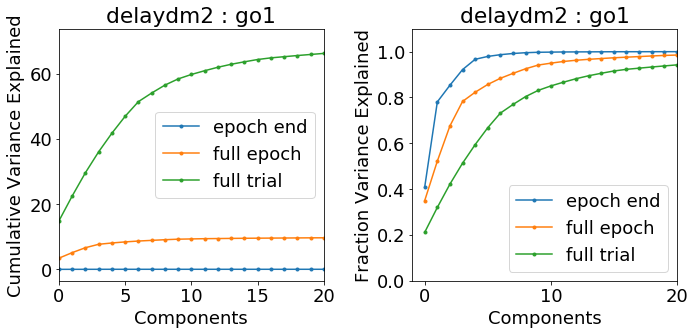

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


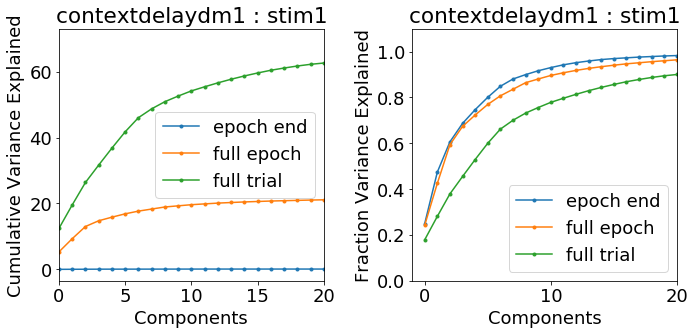

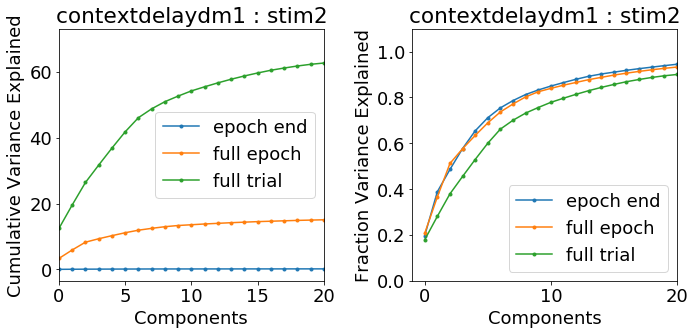

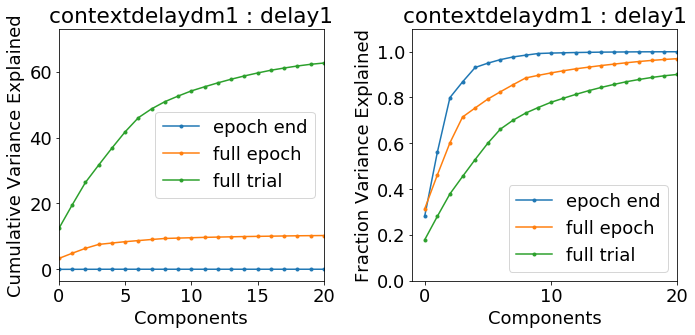

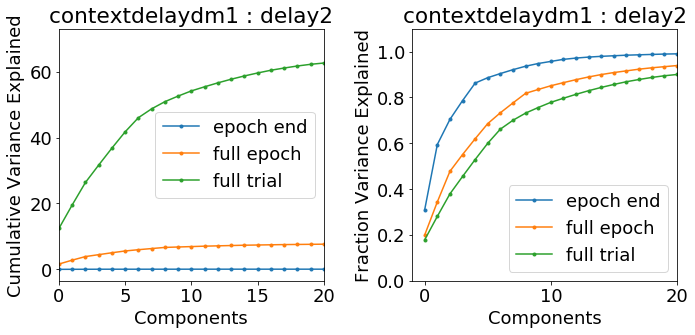

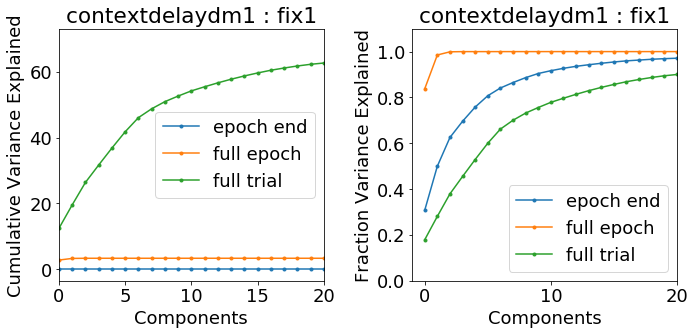

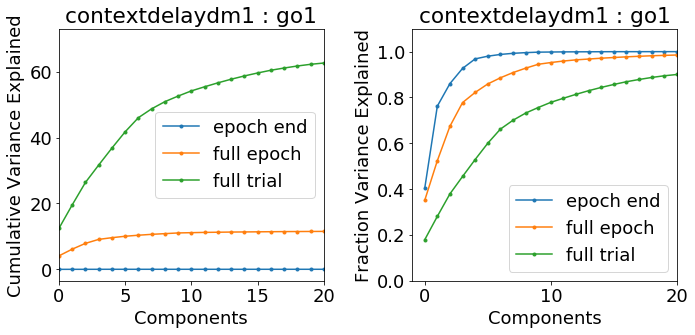

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


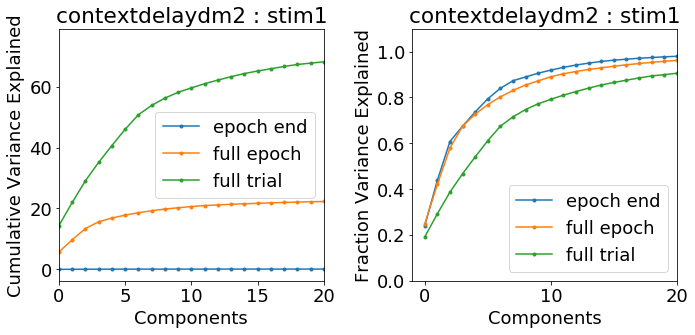

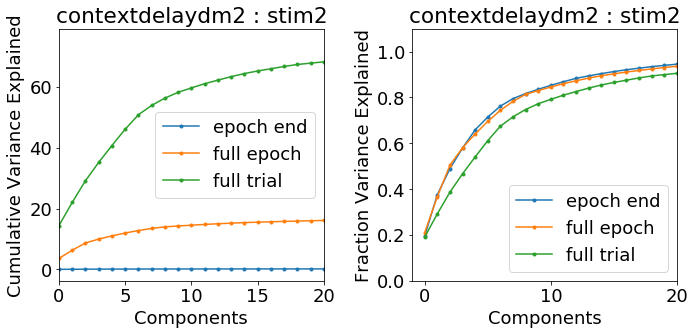

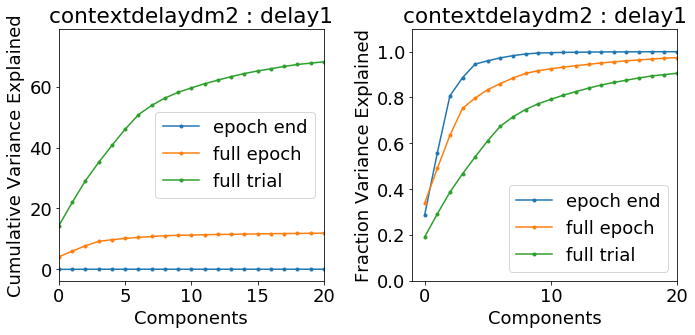

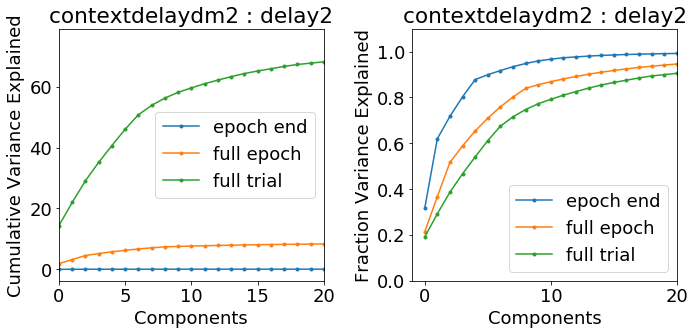

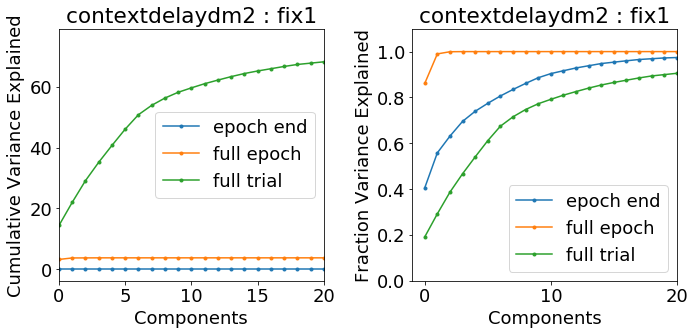

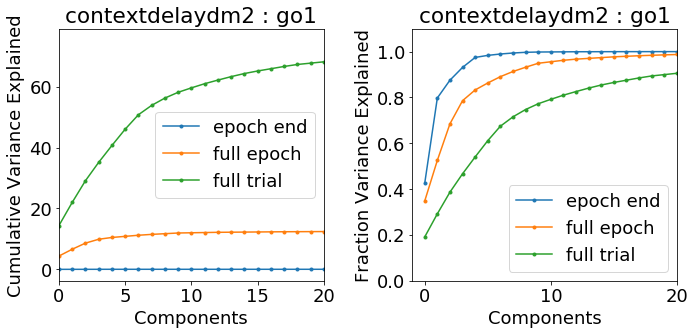

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


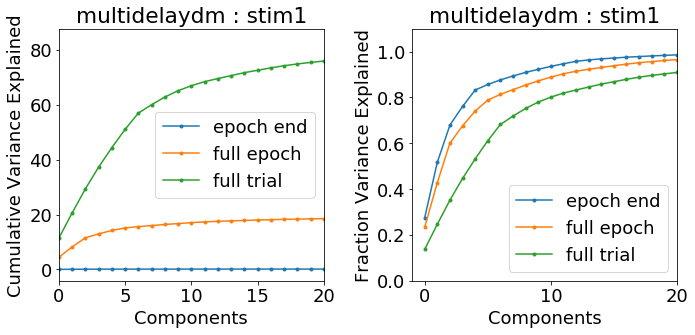

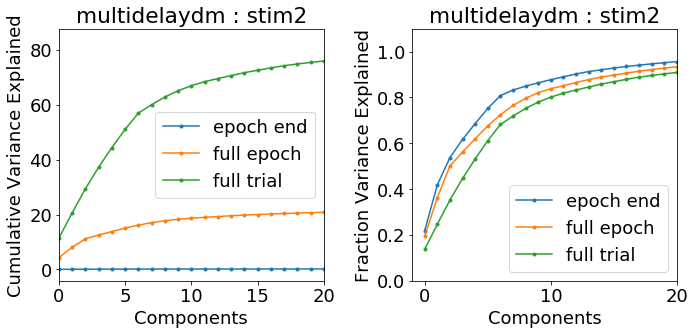

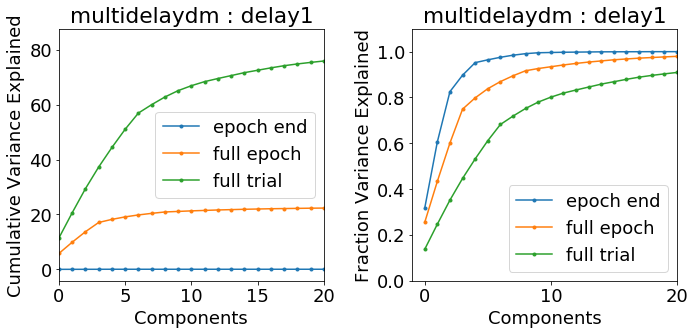

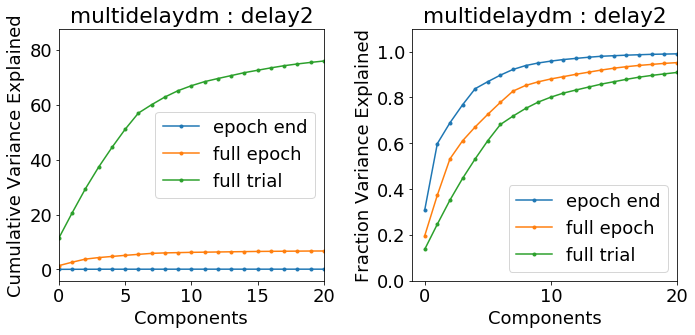

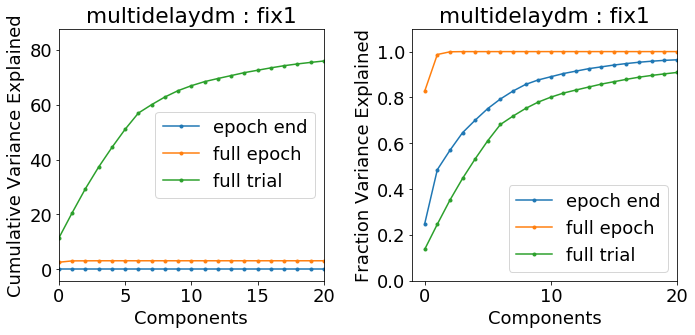

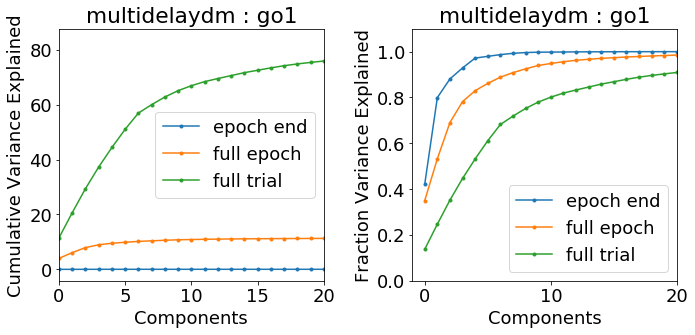

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


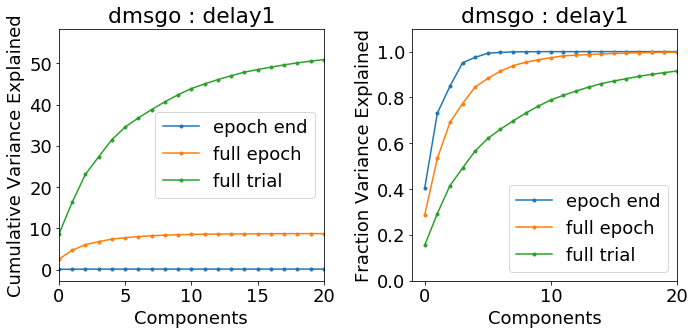

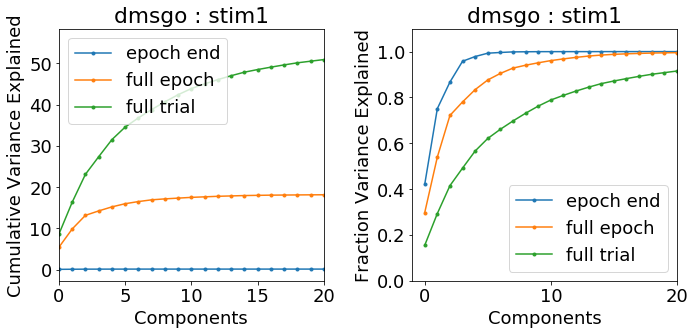

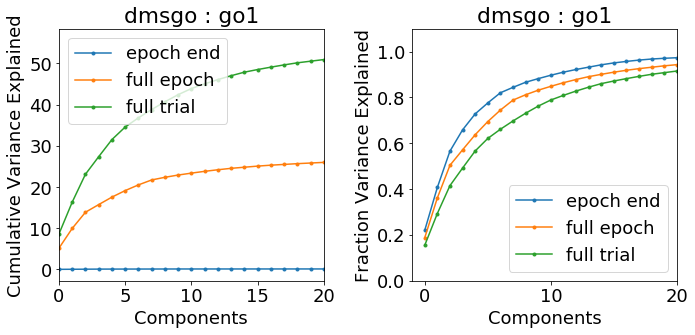

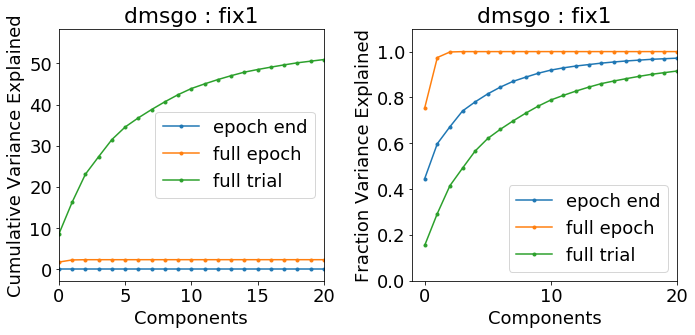

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


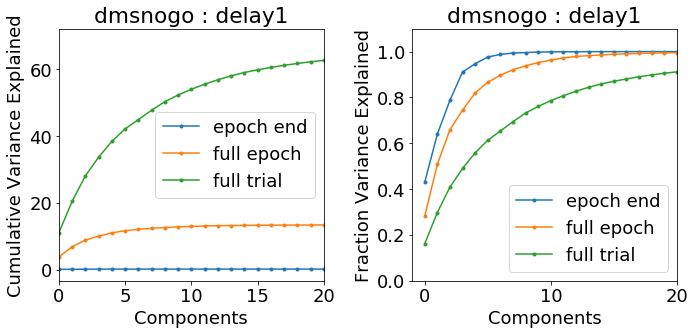

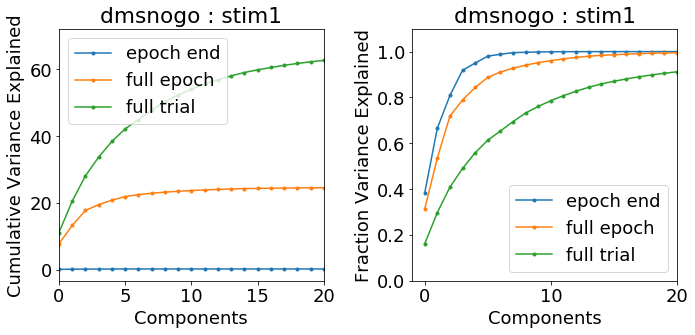

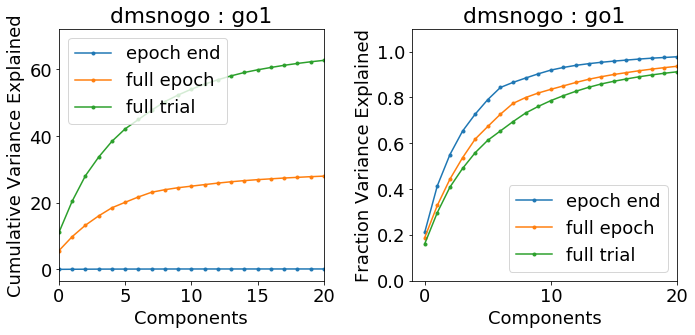

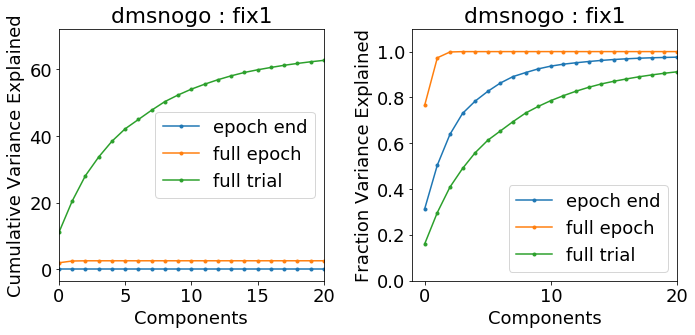

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


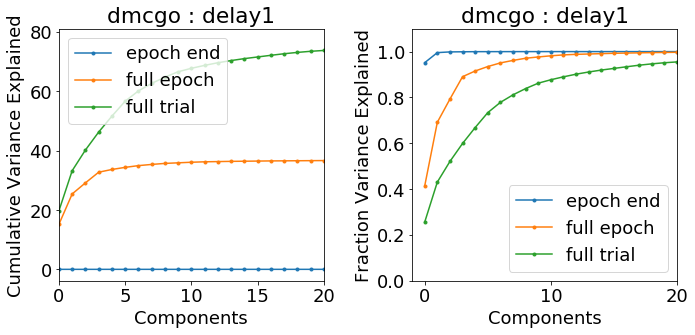

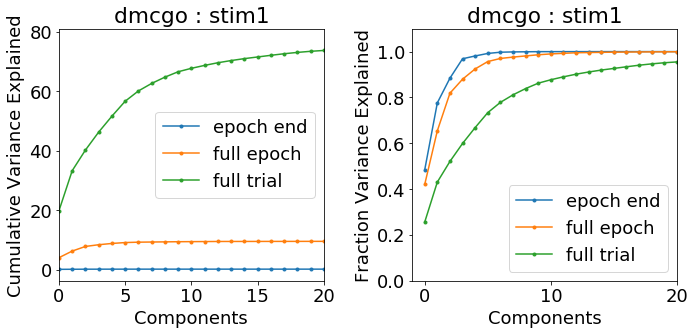

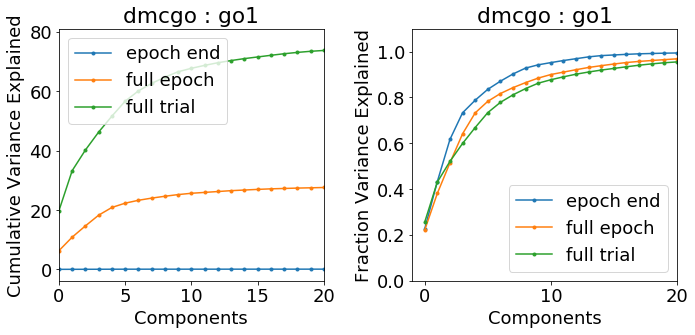

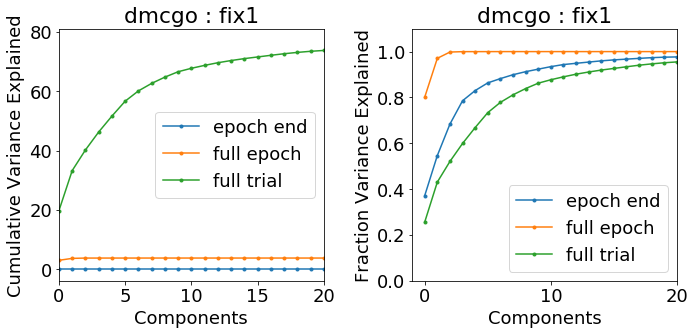

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


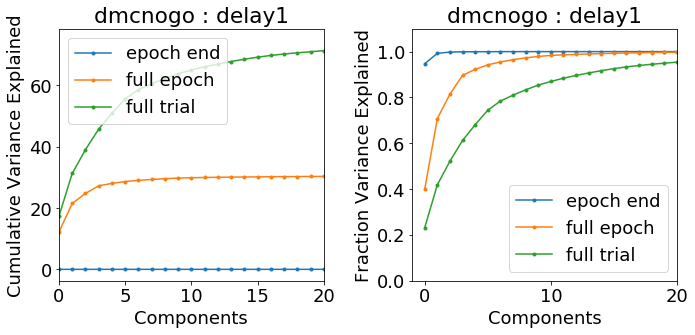

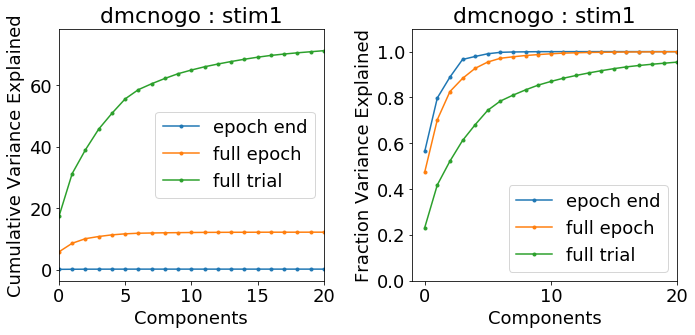

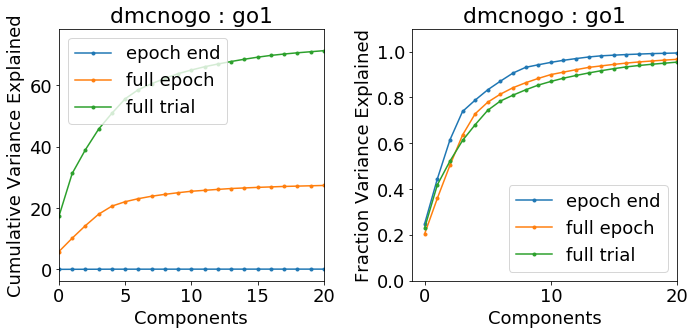

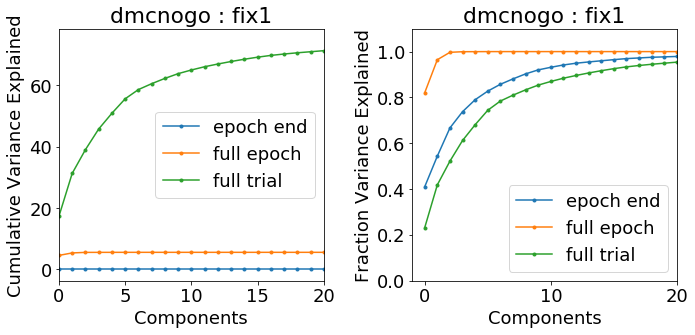

In [14]:
for rule in task_list:
    
    ## plot w test set of trials
    model = Model(model_dir_all)
    with tf.Session() as sess:
        model.saver.restore(sess,ckpt_n_dir)
        hparams = model.hp
        trial = generate_trials(rule, hparams, mode='random', batch_size = 1000, noise_on=False, delay_fac =1)
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        h_tf, _ = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)

    T,S,N = np.shape(h_tf)
    epoch_set = trial.epochs.keys()
    
    for e in epoch_set:

        fig = plt.figure(figsize=(10,5),tight_layout=True,facecolor='white')
        plt.rcParams.update({'font.size': 18})
        
        T_inds = get_T_inds(trial,e)
        X = h_tf[T_inds[-1],:,:]
        X_long = np.reshape(np.transpose(h_tf[T_inds,:,:],(2,0,1)),(N,-1)).T
        X_full = np.reshape(np.transpose(h_tf,(2,0,1)),(N,-1)).T

        pca = PCA()
        X_pca = pca.fit_transform(X)
        X_pca_var = np.var(X_pca,axis = 0)
        total_var = np.sum(X_pca_var)

        pca = PCA()
        X_long_pca = pca.fit_transform(X_long.T)
        X_long_pca_var = np.var(X_long_pca,axis = 0)
        long_total_var = np.sum(X_long_pca_var)

        pca = PCA()
        X_full_pca = pca.fit_transform(X_full.T)
        X_full_pca_var = np.var(X_full_pca,axis = 0)
        full_total_var = np.sum(X_full_pca_var)

        plt.subplot(1,2,1)
        plt.plot(np.cumsum(X_pca_var),'.-', label = 'epoch end')
        plt.plot(np.cumsum(X_long_pca_var),'.-', label = 'full epoch')
        plt.plot(np.cumsum(X_full_pca_var),'.-', label = 'full trial')
#         plt.ylim(0,1.1)
        plt.xlim(0,20)
        plt.legend()
        plt.title(rule+' : '+e)
        plt.ylabel('Cumulative Variance Explained')
        plt.xlabel('Components')
        
        plt.subplot(1,2,2)
        plt.plot(np.cumsum(X_pca_var/total_var),'.-', label = 'epoch end')
        plt.plot(np.cumsum(X_long_pca_var/long_total_var),'.-', label = 'full epoch')
        plt.plot(np.cumsum(X_full_pca_var/full_total_var),'.-', label = 'full trial')
        plt.ylim(0,1.1)
        plt.xlim(-1,20)
        plt.legend()
        plt.title(rule+' : '+e)
        plt.ylabel('Fraction Variance Explained')
        plt.xlabel('Components')
        
        figpath = os.path.join(model_dir_all,'skree plots')
        figname = rule+'_'+e+'.pdf'
        if not os.path.exists(figpath):
            os.makedirs(figpath)
        plt.savefig(os.path.join(figpath,figname))
        plt.show()

In [186]:
nD = 20
X = h_tf[T_inds[-1],:,:]
exp_var = calc_dim(X,nD = nD)
total_var = np.sum(exp_var)

X_long = h_tf[T_inds,:,:]
exp_var_long = calc_dim(X_long,nD = nD)
total_var_long = np.sum(exp_var_long)

XD = np.dot(h_tf[T_inds,:,:],D)
exp_var_D = calc_dim(XD,nD = np.shape(D)[1],N = np.shape(D)[1])
total_var_D = np.sum(exp_var_D)

plt.plot(np.cumsum(exp_var/np.sum(total_var)),'.-')
plt.plot(np.cumsum(exp_var_long/np.sum(total_var_long)),'.-')
plt.plot(np.cumsum(exp_var_D/np.sum(total_var_D)),'.-')
plt.ylim(0,1.1)
plt.show()

In [12]:
def plot_fp_struct_eigenspec(rule,fp_epoch,t_num=0,do_nfp=1):
    
    T,S,N = np.shape(h_tf)
    filename = os.path.join(model_dir_all,'golub_fixed_pts',rule,fp_epoch+'_'+str(t_num)+'.npz')

    if os.path.exists(filename):
        fp_struct = np.load(filename)
        fp_logic = fp_struct['qstar']<.0000001
        eig_decomps = comp_eig_decomp(fp_struct['J_xstar'][fp_logic,:,:])
        
        plt.subplot()
        
        if do_nfp == 0:
            plt.plot(eig_decomps[nfp]['evals'].real,eig_decomps[nfp]['evals'].imag,'.k')
            plt.title('max eigenval : ' +str(np.max(eig_decomps[nfp]['evals'].real)))
        else:
            for nfp in range(len(eig_decomps)):
                plt.plot(eig_decomps[nfp]['evals'].real,eig_decomps[nfp]['evals'].imag,alpha = .1)
                plt.title('max eigenval : ' +str(np.max(eig_decomps[nfp]['evals'].real)),alpha = .1)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/stats/stats.py:2251: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=flo

/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


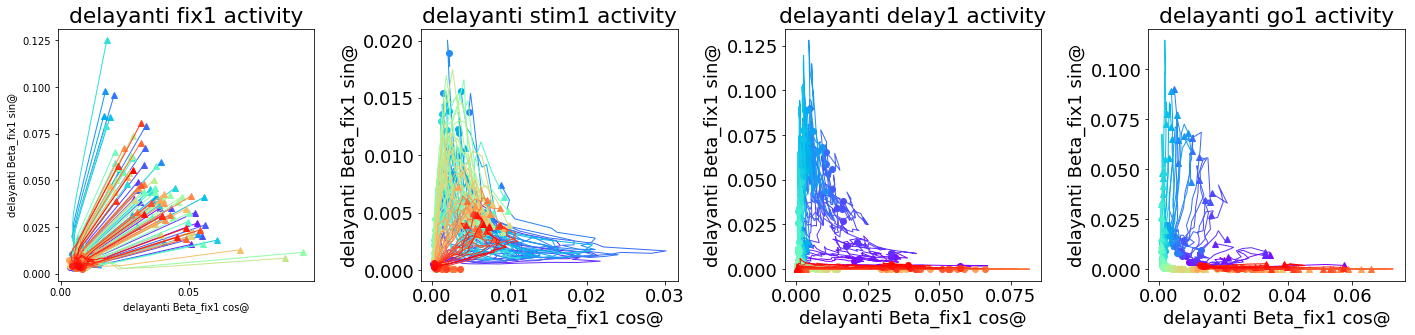

In [15]:
epoch_order = [3,1,0,2]
axes_epoch = 'fix1'

fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')

for fp_epoch_ind in range(len(epoch_set)):
    fp_epoch = epoch_set[epoch_order[fp_epoch_ind]]
    D_stim = make_axes(model_dir_all,ckpt_n_dir,rule,axes_epoch)
    plt.subplot(1,len(epoch_set),fp_epoch_ind+1)
    plot_fp_struct_multicolor(model_dir_all,ckpt_n_dir,tasks,trial_set,rule,D_stim,fp_epoch,axes_epoch,do_plot_FP=0)
#     plt.ylim((-.25,.25))
#     plt.xlim((-.25,.25))
    
figpath = os.path.join(model_dir_all,'tf_fixed_pt_figs',rule)
figname = rule+'_'+axes_epoch+'_axes_Activity_all_trials.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))
plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=flo

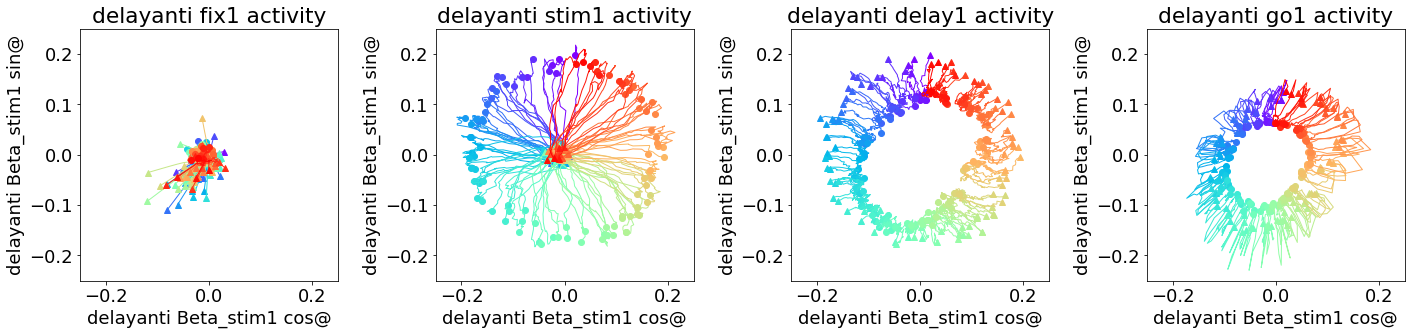

In [16]:
epoch_order = [3,1,0,2]
axes_epoch = 'stim1'

fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')

for fp_epoch_ind in range(len(epoch_set)):
    fp_epoch = epoch_set[epoch_order[fp_epoch_ind]]
    D_stim = make_axes(model_dir_all,ckpt_n_dir,rule,axes_epoch)
    plt.subplot(1,len(epoch_set),fp_epoch_ind+1)
    plot_fp_struct_multicolor(model_dir_all,ckpt_n_dir,tasks,trial_set,rule,D_stim,fp_epoch,axes_epoch,do_plot_FP=0)
    plt.ylim((-.25,.25))
    plt.xlim((-.25,.25))
    
figpath = os.path.join(model_dir_all,'tf_fixed_pt_figs',rule)
figname = rule+'_'+axes_epoch+'_axes_Activity_all_trials.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))
plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=flo

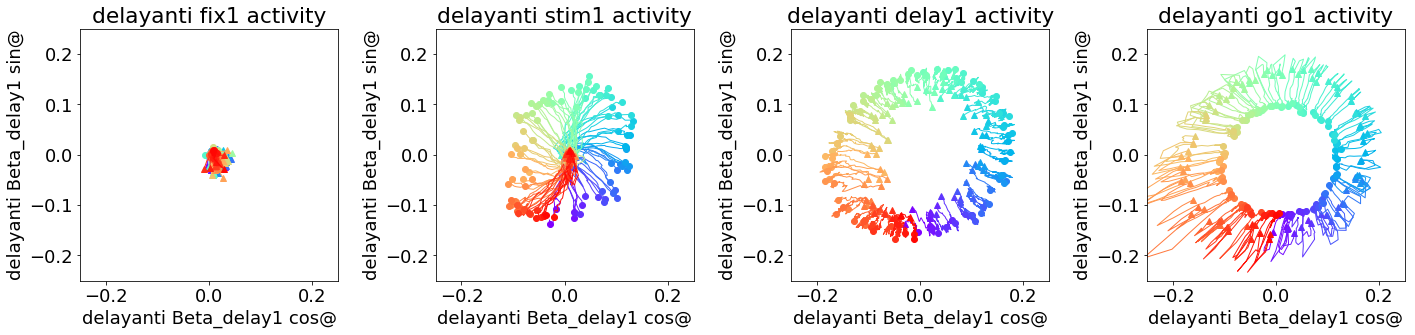

In [19]:
epoch_order = [3,1,0,2]
axes_epoch = 'delay1'

fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')

for fp_epoch_ind in range(len(epoch_set)):
    fp_epoch = epoch_set[epoch_order[fp_epoch_ind]]
    D_stim = make_axes(model_dir_all,ckpt_n_dir,rule,axes_epoch)
    plt.subplot(1,len(epoch_set),fp_epoch_ind+1)
    plot_fp_struct_multicolor(model_dir_all,ckpt_n_dir,tasks,trial_set,rule,D_stim,fp_epoch,axes_epoch,do_plot_FP=0)
    plt.ylim((-.25,.25))
    plt.xlim((-.25,.25))
    
figpath = os.path.join(model_dir_all,'tf_fixed_pt_figs',rule)
figname = rule+'_'+axes_epoch+'_axes_Activity_all_trials.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))
plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=flo

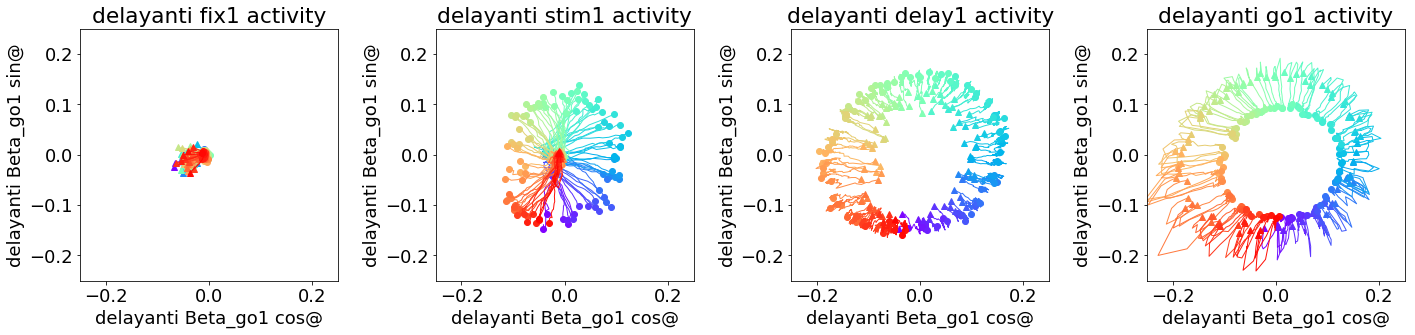

In [20]:
axes_epoch = 'go1'

fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')

for fp_epoch_ind in range(len(epoch_set)):
    fp_epoch = epoch_set[epoch_order[fp_epoch_ind]]
    D_go = make_axes(model_dir_all,ckpt_n_dir,rule,axes_epoch)
    plt.subplot(1,len(epoch_set),fp_epoch_ind+1)
    plot_fp_struct_multicolor(model_dir_all,ckpt_n_dir,tasks,trial_set,rule,D_go,fp_epoch,axes_epoch,do_plot_FP=0)
    plt.ylim((-.25,.25))
    plt.xlim((-.25,.25))
    
figpath = os.path.join(model_dir_all,'tf_fixed_pt_figs',rule)
figname = rule+'_'+axes_epoch+'_axes_Activity_all_trials.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))
plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=flo

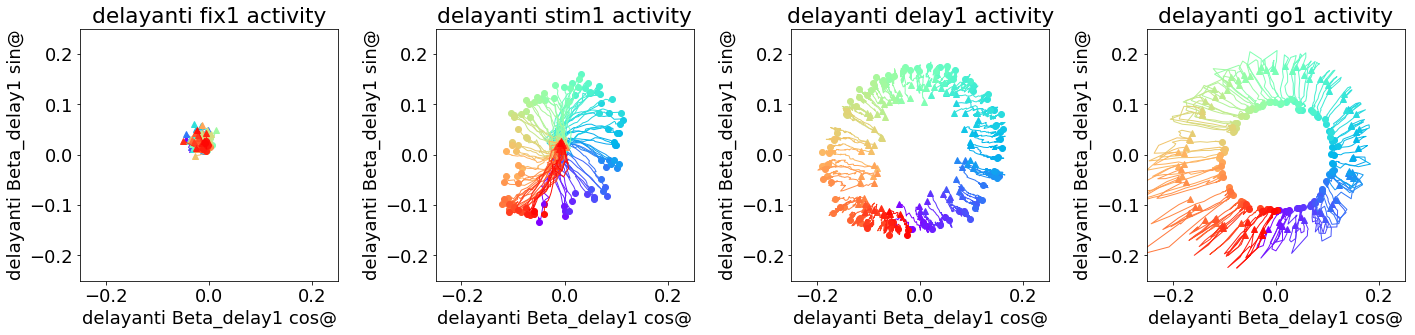

In [28]:
axes_epoch = 'delay1'

fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')

for fp_epoch_ind in range(len(epoch_set)):
    fp_epoch = epoch_set[epoch_order[fp_epoch_ind]]
    D_go = make_axes(model_dir_all,ckpt_n_dir,'delaygo',axes_epoch)
    plt.subplot(1,len(epoch_set),fp_epoch_ind+1)
    plot_fp_struct_multicolor(model_dir_all,ckpt_n_dir,tasks,trial_set,rule,D_go,fp_epoch,axes_epoch,do_plot_FP=0)
    plt.ylim((-.25,.25))
    plt.xlim((-.25,.25))
    
figpath = os.path.join(model_dir_all,'tf_fixed_pt_figs',rule)
figname = rule+'_'+axes_epoch+'_axes_Activity_all_trials.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))
plt.show()

In [26]:
print(rule)

delayanti


In [29]:
tasks

[5]

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
/Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/golub_fixed_pts/d

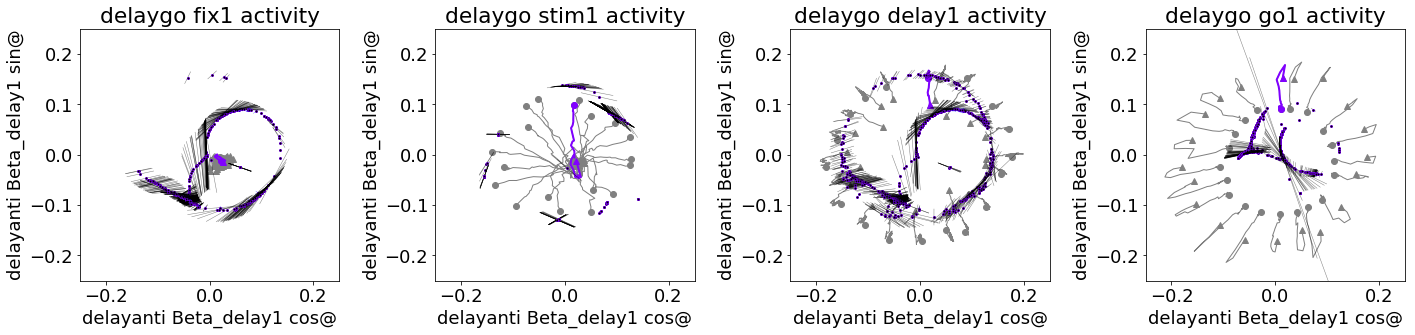

In [30]:
axes_epoch = 'delay1'
fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')
t_num = 0
qlim = .000001

epoch_order = [3, 1, 0, 2]

for fp_epoch_ind in range(len(epoch_order)):
    fp_epoch = epoch_set[epoch_order[fp_epoch_ind]]
    D = make_axes(model_dir_all,ckpt_n_dir,rule,axes_epoch)
    plt.subplot(1,len(epoch_set),fp_epoch_ind+1)
    plot_fp_struct_multicolor(model_dir_all,ckpt_n_dir,[2],trial_set,rule,D,fp_epoch,axes_epoch,do_plot_FP=1,t_num = t_num,qlim = qlim)
    plt.ylim((-.25,.25))
    plt.xlim((-.25,.25))
    
figpath = os.path.join(model_dir_all,'tf_fixed_pt_figs',rule)
figname = rule+'_'+axes_epoch+'_axes_Fp_one_trial_'+str(t_num)+'.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))
plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
/Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/golub_fixed_pts/d

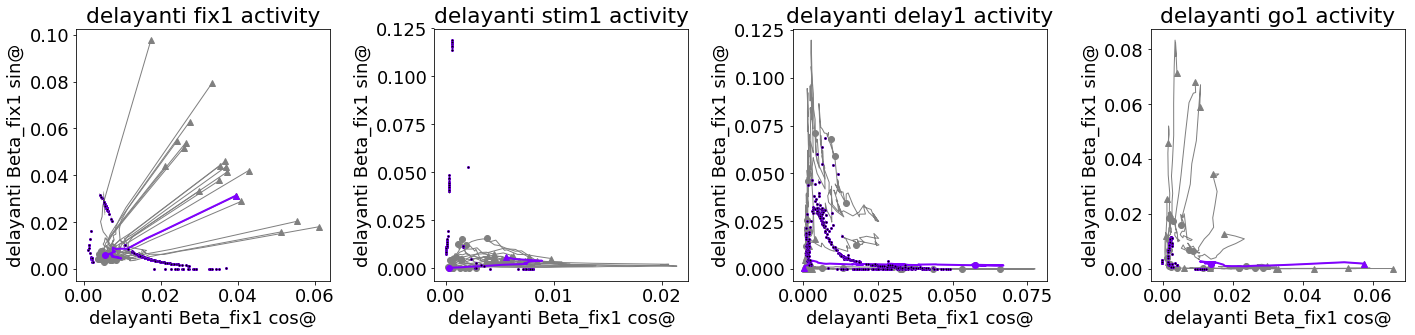

In [22]:
axes_epoch = 'fix1'
fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')
t_num = 0
qlim = .000001

epoch_order = [3, 1, 0, 2]

for fp_epoch_ind in range(len(epoch_order)):
    fp_epoch = epoch_set[epoch_order[fp_epoch_ind]]
    D = make_axes(model_dir_all,ckpt_n_dir,rule,axes_epoch)
    plt.subplot(1,len(epoch_set),fp_epoch_ind+1)
    plot_fp_struct_multicolor(model_dir_all,ckpt_n_dir,tasks,trial_set,rule,D,fp_epoch,axes_epoch,do_plot_FP=1,t_num = t_num,qlim = qlim)
#     plt.ylim((-.25,.25))
#     plt.xlim((-.25,.25))
    
figpath = os.path.join(model_dir_all,'tf_fixed_pt_figs',rule)
figname = rule+'_'+axes_epoch+'_axes_Fp_one_trial_'+str(t_num)+'.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))
plt.show()

In [23]:
from tools_lnd import get_model_params
w_in, b_in, w_out, b_out = get_model_params(model_dir_all,ckpt_n_dir)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=flo

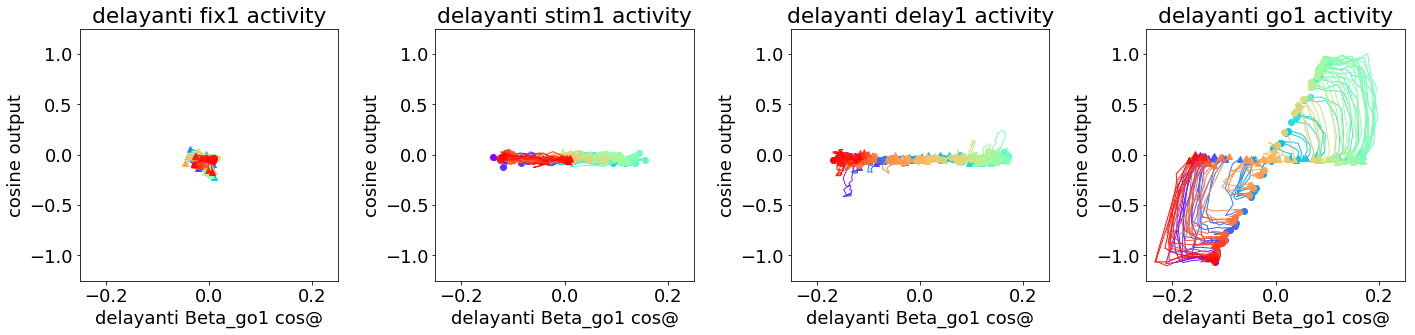

In [24]:
T,S,N = np.shape(h_tf)
trial_set = range(0,S,10)
D = np.concatenate((D_stim[:,1:2],w_out[:,2:3]),axis = 1)
axes_epoch = 'go1'

fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')

for fp_epoch_ind in range(len(epoch_set)):
    fp_epoch = epoch_set[epoch_order[fp_epoch_ind]]
    plt.subplot(1,len(epoch_set),fp_epoch_ind+1)
    plot_fp_struct_multicolor(model_dir_all,ckpt_n_dir,tasks,trial_set,rule,D,fp_epoch,axes_epoch,do_plot_FP=0,t_num = t_num,qlim = .000001)
    plt.ylabel('cosine output')
    plt.ylim((-1.25,1.25))
    plt.xlim((-.25,.25))
    
figpath = os.path.join(model_dir_all,'tf_fixed_pt_figs',rule)
figname = rule+'_'+'ouput axes'+'_axes_Activity_all_trials.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))
plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1372000
/Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/golub_fixed_pts/delayanti/random_trials/fix1_0.npz
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2

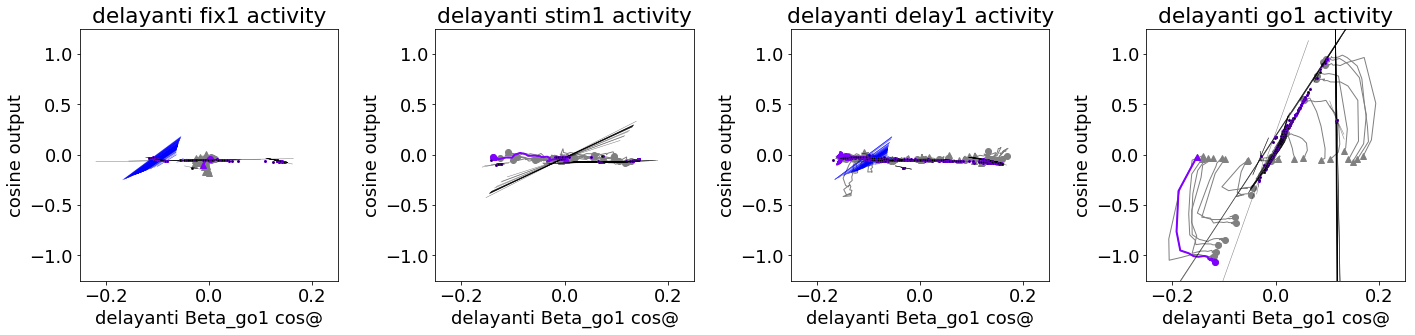

In [25]:
T,S,N = np.shape(h_tf)
trial_set = range(0,S,10)
D = np.concatenate((D_stim[:,1:2],w_out[:,2:3]),axis = 1)
axes_epoch = 'go1'

fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')

for fp_epoch_ind in range(len(epoch_set)):
    fp_epoch = epoch_set[epoch_order[fp_epoch_ind]]
    plt.subplot(1,len(epoch_set),fp_epoch_ind+1)
    plot_fp_struct_multicolor(model_dir_all,ckpt_n_dir,tasks,trial_set,rule,D,fp_epoch,axes_epoch,do_plot_FP=1,t_num = t_num,qlim = .000001)
    plt.ylabel('cosine output')
    plt.ylim((-1.25,1.25))
    plt.xlim((-.25,.25))
    
figpath = os.path.join(model_dir_all,'tf_fixed_pt_figs',rule)
figname = rule+'_'+'ouput axes'+'_axes_Fp_one_trial_'+str(t_num)+'.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))
plt.show()